# CONVOLUTIONAL NETWORKS

The dataset used is relatively small in size. Each example in the dataset has been resized to a (224,224) RGB image, associated with a label from 4 classes(apple,banana,orange and mixed). The dataset serves as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

In this work, I will use the pre-trained model VGG16, developed by Karen Simonyan and Andrew Zisserman in 2014, a simple and widely used convnet architecture for ImageNet,[here is the link to the paper](https://arxiv.org/pdf/1409.1556.pdf),.The model achieves 92.7% top-5 test accuracy in ImageNet.
The dataset used in this work shares the same image size and structure of training and testing splits. The model is trained for 10 epochs with batch size of 32, compiled with categorical_crossentropy loss function and rmsprop optimizer.
At the end I have also implemented a small CNN network as well consisting of 3 convolutional layers and 2 dense layers by increasing number of epoch cycles to 30.

IMPORTING LIBRARIES

In [51]:
from __future__ import print_function, division
from builtins import range, input
# keras libraries
import keras
from keras.layers import *
from keras.models import Model,Sequential
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
# sklearn and matplotlibg for visualisation
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob
import cv2

### LOADING THE DATA 

In [52]:
train_path='/kaggle/input/fruit-images-for-object-detection/data/train'
val_path='/kaggle/input/fruit-images-for-object-detection/data/test'

Number of Images for Training:  240
Number of Images for validating:  60
Number of classes:  4


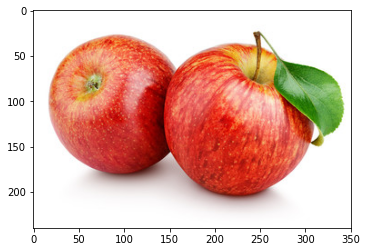

In [53]:
image_files = glob(train_path + '/*/*.jp*g')
valid_image_files = glob(val_path + '/*/*.jp*g')
print("Number of Images for Training: ",len(image_files))
print("Number of Images for validating: ",len(glob(val_path + '/*/*.jp*g')))

# useful for getting number of classes
folders = glob(train_path + '/*')
print("Number of classes: ",len(folders))

# look at a random image 
plt.imshow(image.load_img(np.random.choice(image_files)))

plt.show()

### VGG16 MODEL 

In [54]:
# re-size all the images to 100x100
IMAGE_SIZE = [224, 224] 

# using the VGG16 model but not including the final output layer by using the command (include_top=False).
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

# additional layers
x = Flatten()(vgg.output)
# we can add additional fully connected layers like this.
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [55]:
# compliling the model.
model.compile(
  loss='categorical_crossentropy',
  optimizer='rmsprop',
  metrics=['accuracy']
)

# create an instance of ImageDataGenerator
gen = ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.2,
  horizontal_flip=True,
  vertical_flip=True,
  preprocessing_function=preprocess_input
)

In [144]:
# training config:
epochs = 10
batch_size = 32

# create generators
train_generator = gen.flow_from_directory(
  train_path,
  target_size=IMAGE_SIZE,
  shuffle=False,
  batch_size=batch_size,
)
valid_generator = gen.flow_from_directory(
  val_path,
  target_size=IMAGE_SIZE,
  shuffle=False,
  batch_size=batch_size,
)

Found 240 images belonging to 4 classes.
Found 60 images belonging to 4 classes.


In [56]:
# fit the model
r = model.fit_generator(
  train_generator,
  validation_data=valid_generator,
  epochs=epochs,
  steps_per_epoch=len(image_files) // batch_size,
  validation_steps=len(valid_image_files) // batch_size,
)

Found 240 images belonging to 4 classes.
Found 60 images belonging to 4 classes.
Epoch 1/10


/opt/conda/lib/python3.6/site-packages/PIL/Image.py:969: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


7/7 [==============================] - 48s 7s/step - loss: 22.7606 - accuracy: 0.6106 - val_loss: 2.9397 - val_accuracy: 0.9062
Epoch 2/10
7/7 [==============================] - 46s 7s/step - loss: 2.4902 - accuracy: 0.8894 - val_loss: 11.0053 - val_accuracy: 0.8571
Epoch 3/10
7/7 [==============================] - 46s 7s/step - loss: 2.5203 - accuracy: 0.9279 - val_loss: 2.7646 - val_accuracy: 0.9062
Epoch 4/10
7/7 [==============================] - 46s 7s/step - loss: 1.2673 - accuracy: 0.9423 - val_loss: 1.5168 - val_accuracy: 0.9643
Epoch 5/10
7/7 [==============================] - 52s 7s/step - loss: 2.3859 - accuracy: 0.8929 - val_loss: 6.0125 - val_accuracy: 0.8750
Epoch 6/10
7/7 [==============================] - 43s 6s/step - loss: 0.3920 - accuracy: 0.9792 - val_loss: 0.2267 - val_accuracy: 0.9286
Epoch 7/10
7/7 [==============================] - 49s 7s/step - loss: 1.1719 - accuracy: 0.9375 - val_loss: 2.9616 - val_accuracy: 0.9375
Epoch 8/10
7/7 [===========================

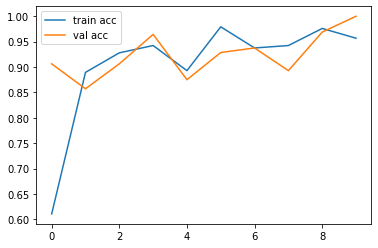

In [57]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

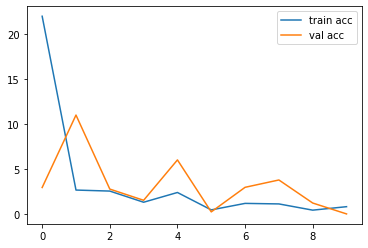

In [67]:
# loss
plt.plot(r.history['loss'], label='train acc')
plt.plot(r.history['val_loss'], label='val acc')
plt.legend()
plt.show()

### SIMPLE 3 LAYERED CNN 

In [58]:
model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=IMAGE_SIZE + [3]))
model1.add(MaxPooling2D(2,2))
model1.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(4, activation='softmax'))

model1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 26, 26, 128)       0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 86528)            

In [59]:
model1.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [63]:
model1.fit_generator(train_generator, steps_per_epoch=16,epochs=20, validation_data=valid_generator, validation_steps=8)

Epoch 1/20
16/16 [==============================] - 39s 2s/step - loss: 0.8612 - accuracy: 0.7292 - val_loss: 4.2346 - val_accuracy: 0.8583
Epoch 2/20
16/16 [==============================] - 54s 3s/step - loss: 0.6721 - accuracy: 0.7167 - val_loss: 0.5200 - val_accuracy: 0.7042
Epoch 3/20
16/16 [==============================] - 36s 2s/step - loss: 0.6606 - accuracy: 0.7875 - val_loss: 4.4116 - val_accuracy: 0.7625
Epoch 4/20
16/16 [==============================] - 36s 2s/step - loss: 1.0340 - accuracy: 0.7542 - val_loss: 0.9210 - val_accuracy: 0.7833
Epoch 5/20
16/16 [==============================] - 36s 2s/step - loss: 0.6852 - accuracy: 0.7729 - val_loss: 0.3895 - val_accuracy: 0.7583
Epoch 6/20
16/16 [==============================] - 36s 2s/step - loss: 1.1985 - accuracy: 0.7375 - val_loss: 3.3509 - val_accuracy: 0.6458
Epoch 7/20
16/16 [==============================] - 36s 2s/step - loss: 0.8612 - accuracy: 0.7104 - val_loss: 0.4248 - val_accuracy: 0.8625
Epoch 8/20
16/16 [==

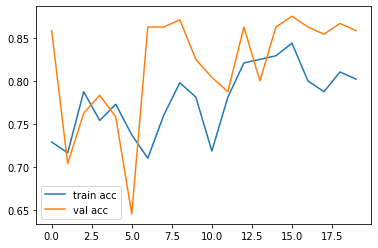

In [64]:
# accuracies
plt.plot(model1.history.history['accuracy'], label='train acc')
plt.plot(model1.history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

### ANALYSING THE RESULTS FROM THE MODELS 

In [145]:
out=model.predict(train_generator)
out1=model1.predict(train_generator)

In [147]:
out

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 4.0952428e-12, 1.6360599e-22, 8.1384428e-09],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 3.5094590e-32],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 2.0137015e-37],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 4.4926507e-35, 1.0454870e-31, 2.5359153e-28],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 6.1194662e-36],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+

In [148]:
out1

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99992728e-01, 7.24386325e-07, 1.56082785e-06, 4.96871417e-06],
       [9.99999404e-01, 2.33660202e-10, 2.84256396e-10, 5.50591835e-07],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.63810032e-29, 1.00387147e-31, 1.27514016e-25],
       [1.00000000e+00, 8.67139801e-31, 2.01849792e-32, 1.21424745e-26],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.42869843e-36],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.02726587e-35],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.05985994e-33],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.35714143e-32],
       [1.00000000e+00, 2.57833536e-37, 1.22326190e-34, 3.74507277e-25],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.10769719e-34],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.08870232e-28],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e

In [149]:
rows=240
columns=4
y_predicted1=[]
for i in range(rows):
    max=-1
    for j in range(columns):
        if(max<out1[i][j]):
            max=out1[i][j]
            max1=j
    y_predicted1.append(max1)

In [150]:
y_predicted1

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 1,
 1,
 3,
 1,
 3,
 3,
 1,
 3,
 1,
 1,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3]

In [151]:
rows=240
columns=4
y_predicted=[]
for i in range(rows):
    max=-1
    for j in range(columns):
        if(max<out[i][j]):
            max=out[i][j]
            max1=j
    y_predicted.append(max1)

In [152]:
y_predicted

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3]

In [157]:
files=[]
categories = []
filenames = os.listdir("/kaggle/input/fruit-images-for-object-detection/data/train/banana")
for filename in filenames:
    categories.append(0)
    files.append(filename)

filenames = os.listdir("/kaggle/input/fruit-images-for-object-detection/data/train/mixed")
for filename in filenames:
    categories.append(1)
    files.append(filename)
    
filenames = os.listdir("/kaggle/input/fruit-images-for-object-detection/data/train/apple")
for filename in filenames:
    categories.append(2)    
    files.append(filename)
    
filenames = os.listdir("/kaggle/input/fruit-images-for-object-detection/data/train/orange")
for filename in filenames:
    categories.append(3)
    files.append(filename)


df = pd.DataFrame({
    'filename': files,
    'category': categories
})

In [103]:
out1=model1.predict(train_generator)

In [158]:
df['category']

0      0
1      0
2      0
3      0
4      0
      ..
235    3
236    3
237    3
238    3
239    3
Name: category, Length: 240, dtype: int64

## CLASSIFICATION REPORT
The classification report visualizer displays the precision, recall, F1, and support scores for the model. 
The classification report shows a representation of the main classification metrics on a per-class basis. This gives a deeper intuition of the classifier behavior over global accuracy which can mask functional weaknesses in one class of a multiclass problem. 

In [159]:
# from the VGG16 model
report = classification_report(df['category'], y_predicted)
print(report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        73
           1       0.25      0.90      0.39        20
           2       1.00      0.23      0.37        75
           3       1.00      1.00      1.00        72

    accuracy                           0.75       240
   macro avg       0.80      0.78      0.68       240
weighted avg       0.92      0.75      0.74       240



In [160]:
# from the simple model.
report = classification_report(df['category'], y_predicted1)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        73
           1       0.21      0.90      0.35        20
           2       0.00      0.00      0.00        75
           3       0.80      0.92      0.86        72

    accuracy                           0.65       240
   macro avg       0.50      0.70      0.55       240
weighted avg       0.56      0.65      0.58       240



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We can clearly see from the classification report that VGG16 model performed way better as compared to a comparatively less dense CNN which was trained on a larger number of epochs. So adding layers does help improve the performance but after the saturation point it also deteoriates the model's accuracy very steeply.